In [2]:
# fashion_mnist
import tensorflow as tf
from tensorflow import keras
import numpy as np

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

x_train = x_train.reshape(60000, -1)
x_test  = x_test.reshape(10000, -1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [3]:
# data normalization

mean = np.mean(x_train)
std  = np.std(x_train)

x_train = (x_train-mean)/std
x_test  = (x_test-mean)/std

In [5]:
class MyActivationLayer(tf.keras.layers.Layer):
    def __init__(self):
        super(MyActivationLayer, self).__init__()

    def call(self, inputs):
        return tf.maximum(inputs, 0)

In [6]:
import tensorflow as tf
import tensorflow.keras as keras

# create model
model = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(keras.layers.Dense(256))
model.add(MyActivationLayer())
model.add(keras.layers.Dense(10))
model.add(tf.keras.layers.Softmax())
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 256)               200960    
                                                                 
 my_activation_layer (MyActi  (None, 256)              0         
 vationLayer)                                                    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
 softmax (Softmax)           (None, 10)                0         
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [7]:
# optimizer and loss
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

# training
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test), 
                    batch_size=256, epochs=100, verbose=2)

Epoch 1/100
235/235 - 2s - loss: 0.7923 - sparse_categorical_accuracy: 0.7332 - val_loss: 0.6059 - val_sparse_categorical_accuracy: 0.7889 - 2s/epoch - 7ms/step
Epoch 2/100
235/235 - 1s - loss: 0.5442 - sparse_categorical_accuracy: 0.8118 - val_loss: 0.5372 - val_sparse_categorical_accuracy: 0.8117 - 1s/epoch - 5ms/step
Epoch 3/100
235/235 - 1s - loss: 0.4912 - sparse_categorical_accuracy: 0.8299 - val_loss: 0.5077 - val_sparse_categorical_accuracy: 0.8209 - 1s/epoch - 5ms/step
Epoch 4/100
235/235 - 1s - loss: 0.4618 - sparse_categorical_accuracy: 0.8392 - val_loss: 0.4809 - val_sparse_categorical_accuracy: 0.8311 - 1s/epoch - 5ms/step
Epoch 5/100
235/235 - 1s - loss: 0.4418 - sparse_categorical_accuracy: 0.8453 - val_loss: 0.4664 - val_sparse_categorical_accuracy: 0.8363 - 1s/epoch - 5ms/step
Epoch 6/100
235/235 - 1s - loss: 0.4269 - sparse_categorical_accuracy: 0.8506 - val_loss: 0.4550 - val_sparse_categorical_accuracy: 0.8386 - 1s/epoch - 5ms/step
Epoch 7/100
235/235 - 1s - loss: 0

Epoch 52/100
235/235 - 1s - loss: 0.2756 - sparse_categorical_accuracy: 0.9030 - val_loss: 0.3538 - val_sparse_categorical_accuracy: 0.8734 - 1s/epoch - 5ms/step
Epoch 53/100
235/235 - 1s - loss: 0.2743 - sparse_categorical_accuracy: 0.9035 - val_loss: 0.3534 - val_sparse_categorical_accuracy: 0.8717 - 1s/epoch - 5ms/step
Epoch 54/100
235/235 - 1s - loss: 0.2732 - sparse_categorical_accuracy: 0.9033 - val_loss: 0.3566 - val_sparse_categorical_accuracy: 0.8708 - 1s/epoch - 5ms/step
Epoch 55/100
235/235 - 1s - loss: 0.2718 - sparse_categorical_accuracy: 0.9042 - val_loss: 0.3525 - val_sparse_categorical_accuracy: 0.8734 - 1s/epoch - 5ms/step
Epoch 56/100
235/235 - 1s - loss: 0.2702 - sparse_categorical_accuracy: 0.9047 - val_loss: 0.3501 - val_sparse_categorical_accuracy: 0.8756 - 1s/epoch - 5ms/step
Epoch 57/100
235/235 - 1s - loss: 0.2686 - sparse_categorical_accuracy: 0.9054 - val_loss: 0.3501 - val_sparse_categorical_accuracy: 0.8746 - 1s/epoch - 5ms/step
Epoch 58/100
235/235 - 1s - 

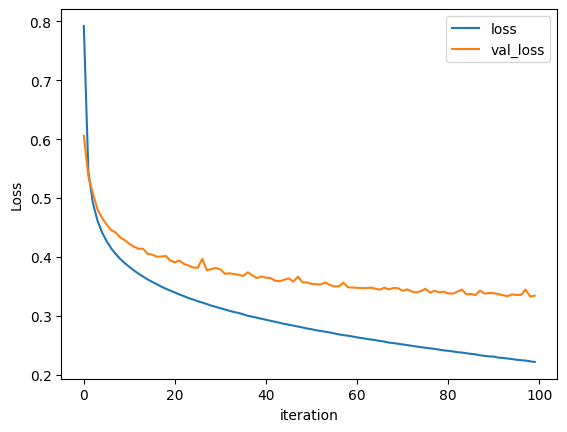

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

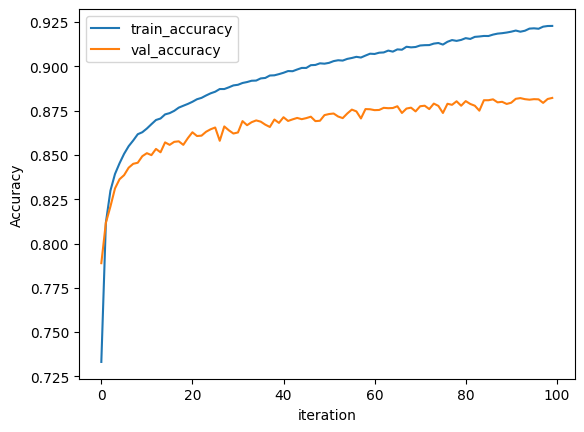

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

In [12]:
model.evaluate(x_test, y_test, 256)

40/40 [==============================] - 0s 3ms/step - loss: 0.3342 - sparse_categorical_accuracy: 0.8822


[0.33424800634384155, 0.8822000026702881]